In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error
import copy

In [2]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

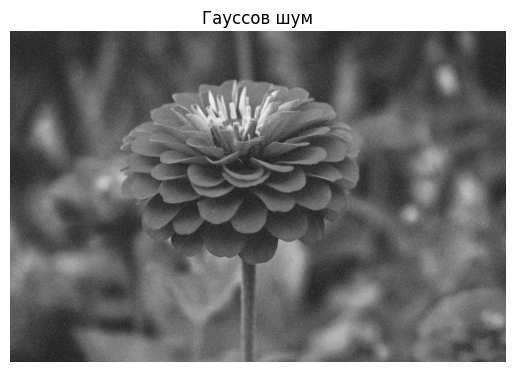

In [3]:
# 1. Гауссов шум
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Гауссов шум")
plt.axis('off')
plt.show()

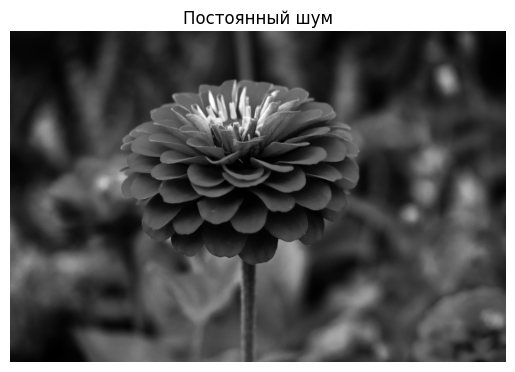

In [4]:
# 2. Постоянный шум
constant_noise = np.full(image_gray.shape, 30, dtype=np.uint8)
image_constant_noise = cv2.add(image_gray, constant_noise)
plt.imshow(image_constant_noise, cmap="gray")
plt.title("Постоянный шум")
plt.axis('off')
plt.show()

In [5]:
# Оценка зашумленных изображений
print("=== Оценка зашумленных изображений ===")
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
ssim_gauss = structural_similarity(image_gray, image_noise_gauss)
print(f"Гауссов шум: MSE = {mse_gauss:.2f}, SSIM = {ssim_gauss:.4f}")

=== Оценка зашумленных изображений ===
Гауссов шум: MSE = 4498.50, SSIM = 0.0259


In [6]:
mse_constant = mean_squared_error(image_gray, image_constant_noise)
ssim_constant = structural_similarity(image_gray, image_constant_noise)
print(f"Постоянный шум: MSE = {mse_constant:.2f}, SSIM = {ssim_constant:.4f}")

Постоянный шум: MSE = 899.99, SSIM = 0.8356


In [7]:
# Тестирование фильтров для гауссова шума
print("\n=== ФИЛЬТРАЦИЯ ГАУССОВА ШУМА ===")


=== ФИЛЬТРАЦИЯ ГАУССОВА ШУМА ===


In [8]:
# Медианный фильтр с разными параметрами
image_gauss_median3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)
image_gauss_median7 = cv2.medianBlur(image_noise_gauss, 7)

In [9]:
# Гауссов фильтр с разными параметрами
image_gauss_gauss3 = cv2.GaussianBlur(image_noise_gauss, (3, 3), 0)
image_gauss_gauss5 = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
image_gauss_gauss7 = cv2.GaussianBlur(image_noise_gauss, (7, 7), 0)

In [10]:
# Билатеральный фильтр с разными параметрами
image_gauss_bilat1 = cv2.bilateralFilter(image_noise_gauss, 5, 50, 50)
image_gauss_bilat2 = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
image_gauss_bilat3 = cv2.bilateralFilter(image_noise_gauss, 15, 100, 100)

In [11]:
# Фильтр нелокальных средних с разными параметрами
image_gauss_nlm1 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10)
image_gauss_nlm2 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
image_gauss_nlm3 = cv2.fastNlMeansDenoising(image_noise_gauss, h=30)

In [12]:
# Оценка результатов для гауссова шума
filters_gauss = {
    'Медианный 3x3': image_gauss_median3,
    'Медианный 5x5': image_gauss_median5,
    'Медианный 7x7': image_gauss_median7,
    'Гауссов 3x3': image_gauss_gauss3,
    'Гауссов 5x5': image_gauss_gauss5,
    'Гауссов 7x7': image_gauss_gauss7,
    'Билатеральный (5,50,50)': image_gauss_bilat1,
    'Билатеральный (9,75,75)': image_gauss_bilat2,
    'Билатеральный (15,100,100)': image_gauss_bilat3,
    'NLM h=10': image_gauss_nlm1,
    'NLM h=20': image_gauss_nlm2,
    'NLM h=30': image_gauss_nlm3
}

In [13]:
best_ssim_gauss = 0
best_filter_gauss = ""

In [14]:
for name, filtered in filters_gauss.items():
    mse = mean_squared_error(image_gray, filtered)
    ssim_val = structural_similarity(image_gray, filtered)
    print(f"{name:25}: MSE = {mse:6.2f}, SSIM = {ssim_val:.4f}")

    if ssim_val > best_ssim_gauss:
        best_ssim_gauss = ssim_val
        best_filter_gauss = name

Медианный 3x3            : MSE = 844.07, SSIM = 0.1536
Медианный 5x5            : MSE = 333.25, SSIM = 0.3658
Медианный 7x7            : MSE = 188.66, SSIM = 0.5445
Гауссов 3x3              : MSE = 1926.51, SSIM = 0.1412
Гауссов 5x5              : MSE = 1729.21, SSIM = 0.2304
Гауссов 7x7              : MSE = 1627.56, SSIM = 0.3475
Билатеральный (5,50,50)  : MSE = 3048.23, SSIM = 0.0427
Билатеральный (9,75,75)  : MSE = 1786.39, SSIM = 0.1045
Билатеральный (15,100,100): MSE = 1359.92, SSIM = 0.2079
NLM h=10                 : MSE = 4498.36, SSIM = 0.0261
NLM h=20                 : MSE = 4486.27, SSIM = 0.0289
NLM h=30                 : MSE = 2778.29, SSIM = 0.0833


In [15]:
print(f"\nЛучший фильтр для гауссова шума: {best_filter_gauss} (SSIM = {best_ssim_gauss:.4f})")


Лучший фильтр для гауссова шума: Медианный 7x7 (SSIM = 0.5445)


In [16]:
# Тестирование фильтров для постоянного шума
print("\n=== ФИЛЬТРАЦИЯ ПОСТОЯННОГО ШУМА ===")


=== ФИЛЬТРАЦИЯ ПОСТОЯННОГО ШУМА ===


In [17]:
# Медианный фильтр с разными параметрами
image_constant_median3 = cv2.medianBlur(image_constant_noise, 3)
image_constant_median5 = cv2.medianBlur(image_constant_noise, 5)
image_constant_median7 = cv2.medianBlur(image_constant_noise, 7)

In [18]:
# Гауссов фильтр с разными параметрами
image_constant_gauss3 = cv2.GaussianBlur(image_constant_noise, (3, 3), 0)
image_constant_gauss5 = cv2.GaussianBlur(image_constant_noise, (5, 5), 0)
image_constant_gauss7 = cv2.GaussianBlur(image_constant_noise, (7, 7), 0)

In [19]:
# Билатеральный фильтр с разными параметрами
image_constant_bilat1 = cv2.bilateralFilter(image_constant_noise, 5, 50, 50)
image_constant_bilat2 = cv2.bilateralFilter(image_constant_noise, 9, 75, 75)
image_constant_bilat3 = cv2.bilateralFilter(image_constant_noise, 15, 100, 100)

In [20]:
# Фильтр нелокальных средних с разными параметрами
image_constant_nlm1 = cv2.fastNlMeansDenoising(image_constant_noise, h=10)
image_constant_nlm2 = cv2.fastNlMeansDenoising(image_constant_noise, h=20)
image_constant_nlm3 = cv2.fastNlMeansDenoising(image_constant_noise, h=30)

In [21]:
# Оценка результатов для постоянного шума
filters_constant = {
    'Медианный 3x3': image_constant_median3,
    'Медианный 5x5': image_constant_median5,
    'Медианный 7x7': image_constant_median7,
    'Гауссов 3x3': image_constant_gauss3,
    'Гауссов 5x5': image_constant_gauss5,
    'Гауссов 7x7': image_constant_gauss7,
    'Билатеральный (5,50,50)': image_constant_bilat1,
    'Билатеральный (9,75,75)': image_constant_bilat2,
    'Билатеральный (15,100,100)': image_constant_bilat3,
    'NLM h=10': image_constant_nlm1,
    'NLM h=20': image_constant_nlm2,
    'NLM h=30': image_constant_nlm3
}

In [22]:
best_ssim_constant = 0
best_filter_constant = ""

In [23]:
for name, filtered in filters_constant.items():
    mse = mean_squared_error(image_gray, filtered)
    ssim_val = structural_similarity(image_gray, filtered)
    print(f"{name:25}: MSE = {mse:6.2f}, SSIM = {ssim_val:.4f}")

    if ssim_val > best_ssim_constant:
        best_ssim_constant = ssim_val
        best_filter_constant = name

Медианный 3x3            : MSE = 903.15, SSIM = 0.7558
Медианный 5x5            : MSE = 906.02, SSIM = 0.7050
Медианный 7x7            : MSE = 905.66, SSIM = 0.7034
Гауссов 3x3              : MSE = 906.56, SSIM = 0.7839
Гауссов 5x5              : MSE = 907.70, SSIM = 0.7527
Гауссов 7x7              : MSE = 909.72, SSIM = 0.7287
Билатеральный (5,50,50)  : MSE = 880.61, SSIM = 0.7319
Билатеральный (9,75,75)  : MSE = 911.86, SSIM = 0.7049
Билатеральный (15,100,100): MSE = 912.87, SSIM = 0.7007
NLM h=10                 : MSE = 910.95, SSIM = 0.7055
NLM h=20                 : MSE = 912.10, SSIM = 0.7012
NLM h=30                 : MSE = 912.75, SSIM = 0.6998


In [24]:
print(f"\nЛучший фильтр для постоянного шума: {best_filter_constant} (SSIM = {best_ssim_constant:.4f})")


Лучший фильтр для постоянного шума: Гауссов 3x3 (SSIM = 0.7839)


In [25]:
# Визуализация лучших результатов
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

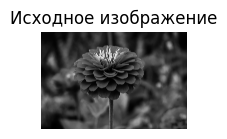

In [26]:
# Исходное изображение
plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

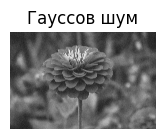

In [27]:
# Зашумленные изображения
plt.subplot(2, 3, 2)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Гауссов шум")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

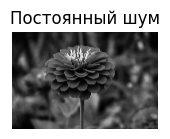

In [28]:
plt.subplot(2, 3, 3)
plt.imshow(image_constant_noise, cmap="gray")
plt.title("Постоянный шум")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

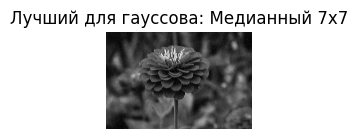

In [29]:
# Лучшие результаты для гауссова шума
plt.subplot(2, 3, 4)
best_gauss_img = filters_gauss[best_filter_gauss]
plt.imshow(best_gauss_img, cmap="gray")
plt.title(f"Лучший для гауссова: {best_filter_gauss}")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

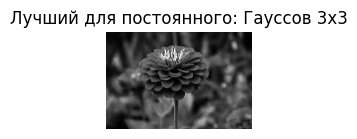

In [30]:
# Лучшие результаты для постоянного шума
plt.subplot(2, 3, 5)
best_constant_img = filters_constant[best_filter_constant]
plt.imshow(best_constant_img, cmap="gray")
plt.title(f"Лучший для постоянного: {best_filter_constant}")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

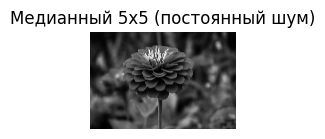

In [31]:
# Сравнение медианного фильтра для обоих типов шума
plt.subplot(2, 3, 6)
plt.imshow(image_constant_median5, cmap="gray")
plt.title("Медианный 5x5 (постоянный шум)")
plt.axis('off')

In [32]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [33]:
# Сводная таблица результатов
print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*60)
print(f"{'Тип шума':<15} {'Лучший фильтр':<25} {'SSIM':<8}")
print("-"*60)
print(f"{'Гауссов':<15} {best_filter_gauss:<25} {best_ssim_gauss:.4f}")
print(f"{'Постоянный':<15} {best_filter_constant:<25} {best_ssim_constant:.4f}")
print("="*60)


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Тип шума        Лучший фильтр             SSIM    
------------------------------------------------------------
Гауссов         Медианный 7x7             0.5445
Постоянный      Гауссов 3x3               0.7839
